In [1]:
import datetime
import json
import requests

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题


In [3]:
USER_AGENT = "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36"

In [4]:
session = requests.Session()
print(session.headers)

session.headers['User-Agent'] = USER_AGENT
print(session.headers)

{'User-Agent': 'python-requests/2.18.4', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
{'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


In [5]:
def str2datetime(s):
    dt = datetime.datetime.strptime(s, "%Y-%m-%d")
    return dt
# print(str2datetime('2017-01-23'))
# datetime.datetime(2017, 1, 23, 0, 0)

def datetime2str(dt):
    s = dt.strftime("%d %b %Y")
    return s

# print(datetime2str(str2datetime('2017-01-23')))
# '23 Jan 2017'

# Reference: http://strftime.org/

In [6]:
URL = "http://www.chinamoney.com.cn/dqs/rest/dqs-u-fx/RefRateHis"

In [7]:
def get_data(pair, start_date, end_date):
    start_dt, end_dt = str2datetime(str(start_date)), str2datetime(str(end_date))
    currency1, currency2 = pair
    
    start_str, end_str = datetime2str(start_dt), datetime2str(end_dt)
    
    data = {'lang' : 'CN',
            'startDateTool'  : start_str,
            'endDateTool'    : end_str,
            'currencyCode'   : '.'.join((currency1, currency2))
           }
    return data

get_data(['USD', 'CNY'], '2017-01-01', '2017-03-19')

{'currencyCode': 'USD.CNY',
 'endDateTool': '19 Mar 2017',
 'lang': 'CN',
 'startDateTool': '01 Jan 2017'}

In [130]:
def get_rates(pair, start_date, end_date):
    data = get_data(pair, start_date, end_date)
    
    res = session.get(URL, params=data)
    if res.status_code != 200:
        print("query_error, status_code = ", res.status_code)
        return res
    
    rsp = res.text
    rsp_json = json.loads(rsp)
    raw_records = rsp_json['records']
    
    records = [(record['dealDate'], record['ccyPair'], float(record['rateOf15hour'])) for record in raw_records]
    records = sorted(records, key=lambda tuple_: tuple_[0])

    date = [r[0] for r in records]
    pair_name = records[0][1]
    exchange_rate = [r[2] for r in records]
    return pair_name, date, exchange_rate

In [131]:
pair1, date1, exchange_rate1 = get_rates(['USD', 'CNY'], '2017-01-01', '2017-12-31')

In [132]:
pair2, date2, exchange_rate2 = get_rates(['EUR', 'CNY'], '2017-01-01', '2017-12-31')

In [44]:
res_raw = get_rates(['USD', 'CNY'], '2017-01-01', '2017-12-31')
rate_records = [(record['dealDate'], record['ccyPair'], float(record['rateOf15hour'])) for record in res_raw]
rate_records = sorted(rate_records, key=lambda student: student[0])

date = [r[0] for r in rate_records]
pair_name = rate_records[0][1]
exchange_rate = [r[2] for r in rate_records]

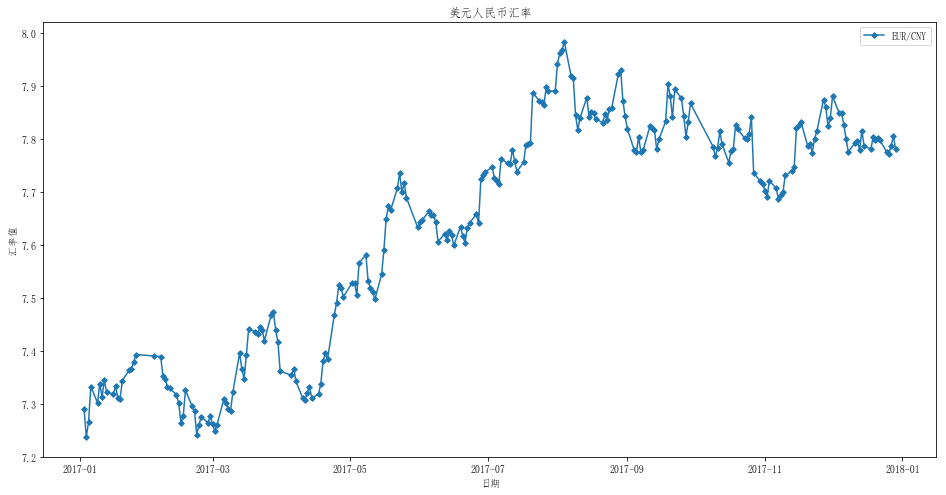

In [129]:
def plot_fx_rates(date, rates, title):
    plt.figure(figsize=(16, 8))
    # = plt.subplot()
    plt.plot(date, rates, label=pair_name, marker='D', markersize=4)
    
    plt.xlabel("日期")
    plt.ylabel("汇率值")
    plt.title(title)
    plt.legend()
    plt.show()

tmp = plot_fx_rates(date, exchange_rate, "美元人民币汇率")

In [115]:
res_raw = get_rates(['EUR', 'CNY'], '2017-01-01', '2017-12-31')
rate_records = [(record['dealDate'], record['ccyPair'], float(record['rateOf15hour'])) for record in res_raw]
rate_records = sorted(rate_records, key=lambda student: student[0])

date = [str2datetime(r[0]) for r in rate_records]
pair_name = rate_records[0][1]
exchange_rate = [r[2] for r in rate_records]

In [116]:
date[:5]

[datetime.datetime(2017, 1, 3, 0, 0),
 datetime.datetime(2017, 1, 4, 0, 0),
 datetime.datetime(2017, 1, 5, 0, 0),
 datetime.datetime(2017, 1, 6, 0, 0),
 datetime.datetime(2017, 1, 9, 0, 0)]

[736330. 736389. 736450. 736511. 736573. 736634. 736695.]
[736330.]


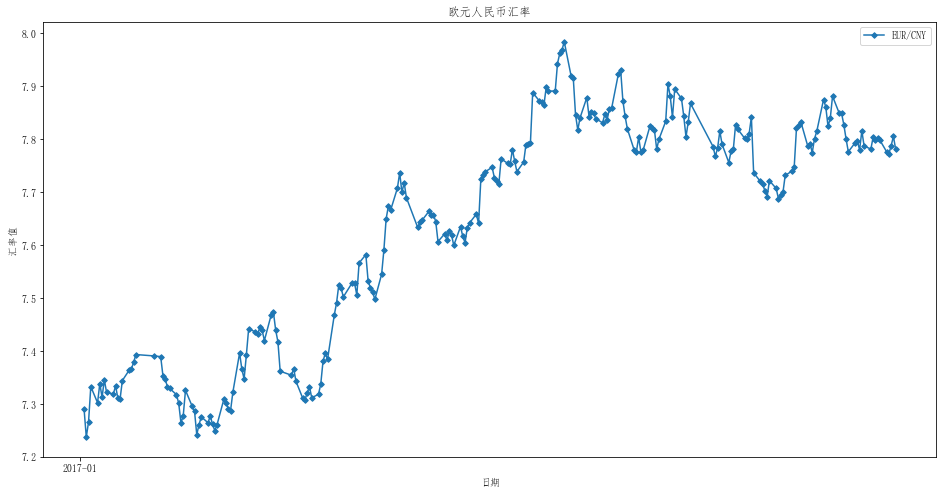

In [112]:
plot_fx_rates(date, exchange_rate, "欧元人民币汇率")

In [176]:
def plot_fx_rates_multi(date, rate1, rate2, label1, label2, title):
    plt.figure(figsize=(16, 8))
    ax1 = plt.subplot()
    ax1.plot(date, rate1, label=label1, color='green', marker='D', markersize=4)
    ax1.legend(loc='upper right')
    
    #_max_x_label = 20
    #labels = list(range(len(date)))[: : len(date)//10 + 1]

    #lt.xticks(xlabels)
    #ax1.set(xticks=xlabels)
    #plt.xticks(date[::10])
    #plt.xticks(rotation=45)
    
    ax2 = ax1.twinx()
    ax2.plot(date, rate2, label=label2, color='red', marker='D', markersize=4)
    ax2.legend(loc='upper left')
    
    ax1.set_xlabel("日期")
    ax1.set_ylabel("汇率值")
    ax2.set_ylabel("汇率值")
    plt.title(title)
    plt.show()

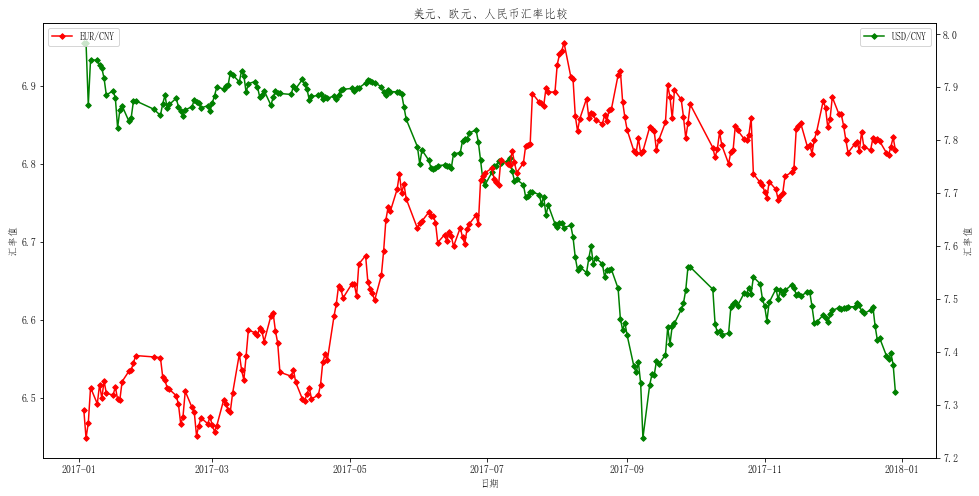

In [178]:
plot_fx_rates_multi(date, exchange_rate1, exchange_rate2, pair1, pair2, "美元、欧元、人民币汇率比较")